# Decision Trees

DT are a non-parametric supervised learning method used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. The decision rules are generally in form of if-then-else statements. The deeper the tree, the more complex the rules and fitter the model.

* Instances: Refer to the vector of features or attributes that define the input space
* Attribute: A quantity describing an instance
* Concept: The function that maps input to output
* Target Concept: The function that we are trying to find, i.e., the actual answer
* Hypothesis Class: Set of all the possible functions
* Sample: A set of inputs paired with a label, which is the correct output (also known as the Training Set)
* Candidate Concept: A concept which we think is the target concept
* Testing Set: Similar to the training set and is used to test the candidate concept and determine its performance

* Entropy: Measure of uncertainty associated with our data `H = -sigma[p(x) log(p(x))]`, where p(x) is the % of the group that belongs to a given class and H is the entropy
* Information Gain: A measure that expresses how well an attribute splits data into groups based on classification

Decision tree should be split so that entropy is minimal. Information gain is used to determine the best split:
`Gain(S,D) = H(S) - sigma(|V|/|S| * H(V))` where, S is the original set and D is the splitting of the set (a partition). Each V is a subset of S. All of the V’s are disjoint and make up S. So the Information gain is just the original Entropy of the data before the split H(S), minus the sum of the weighted split entropy values.

### Advantages
* Easy to use and understand
* Can capture non-linear patterns
* Can handle both categorical and numerical data
* Resistant to outliers, hence require little data preprocessing
* New features can be easily added
* Can be used to build larger classifiers by using ensemble methods.

### Disadvantages
* Prone to overfitting, esp. with noisy data
* Require some kind of measurement as to how well they are doing
* Need to be careful with parameter tuning
* Can create biased learned trees if some classes dominate.

### Fixing overfitting:
* Pre-pruning that stop growing the tree earlier, before it perfectly classifies the training set - precise estimation is hard for this method that's why post-pruning is preferred
* Post-pruning that allows the tree to perfectly classify the training set, and then post prune the tree (error estimation / chi-test)
* Use random forests

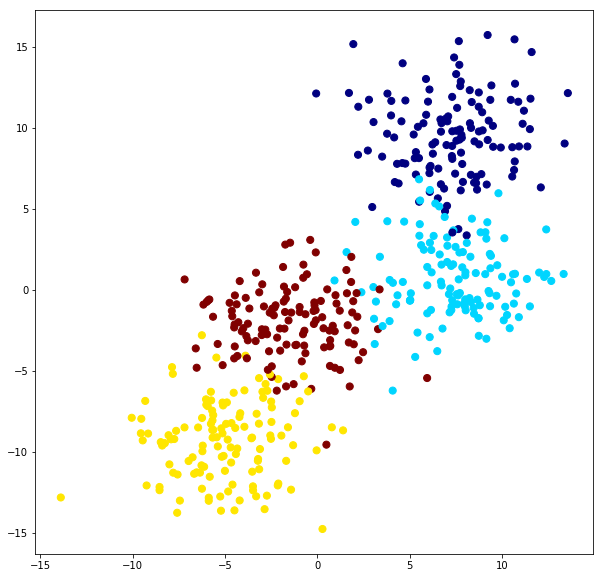

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=4,
                  random_state=8, cluster_std=2.4)

#Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Random Forests can also be used with regressions - from sklearn.ensemble import RandomForestRegressor